# Repository integrity missmatch


## Detector overview



In [25]:
import json
import os

import numpy
from matplotlib import pyplot as plt

import guarddog.analyzer.metadata.pypi.repository_integrity_missmatch as repository_integrity_missmatch
data_path = os.path.join(".", "resources", "all_package_info", "all_info.json")
if not os.path.exists(data_path):
    import resources.all_package_info.build

with open(data_path, "r") as fd:
    ALL_PACKAGE_INFO = json.load(fd)

## Find GitHub candidates



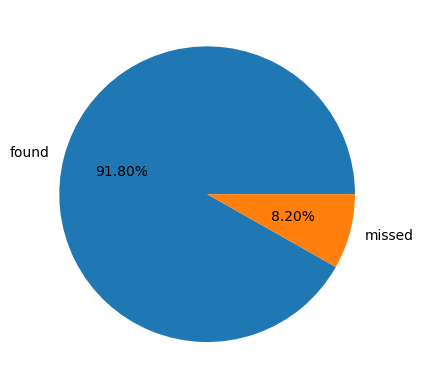

In [26]:
all_candidates = {}
build_candidates = [0, 0]
for name in list(ALL_PACKAGE_INFO.keys()):
    candidates = repository_integrity_missmatch.find_github_candidates(ALL_PACKAGE_INFO[name])
    if len(candidates) > 0:
        build_candidates[0] += 1
        all_candidates[name] = candidates
    else:
        build_candidates[1] += 1

y = numpy.array(build_candidates)
labels = ["found", "missed"]
plt.pie(y, labels = labels, autopct = "%1.2f%%")
plt.show()

## Find best candidate


charset-normalizer
google-api-core
awscli
rsa
importlib-metadata
googleapis-common-protos
azure-core
google-cloud-storage
google-cloud-bigquery
importlib-resources
azure-storage-blob
tabulate
filelock
google-cloud-core
azure-common
pymysql
mypy-extensions
msal
webencodings
adal
regex
msal-extensions
prometheus-client
absl-py
azure-identity
setuptools-scm
nest-asyncio
pymongo
ruamel-yaml
sentry-sdk
redshift-connector
jupyter-client
pyathena
typed-ast
google-cloud-secret-manager
lazy-object-proxy
jupyter-core
azure-storage-common
grpc-google-iam-v1
sortedcontainers
futures
google-cloud-pubsub
progressbar2
awswrangler
prometheus-flask-exporter
smart-open
azure-mgmt-resource
typing-inspect
fastjsonschema
humanfriendly
xlsxwriter
jupyterlab-pygments
applicationinsights
pysocks
jsonpointer
colorlog
pywavelets
opt-einsum
google-cloud-bigquery-storage
azure-nspkg
tensorboard-plugin-wit
jsonpatch
ujson
libcst
azure-mgmt-core
stack-data
azure-mgmt-storage
pure-eval
jupyterlab-widgets
azure-keyva

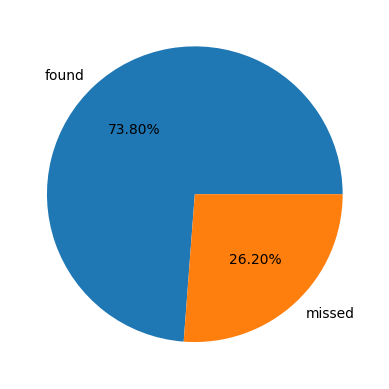

In [27]:
find_repo = [0, 0]
repo_urls = {}
for name in all_candidates.keys():
    repo = repository_integrity_missmatch.find_best_github_candidate(all_candidates[name], name)
    if repo is not None:
        find_repo[0] += 1
        repo_urls[name] = repo
    else:
        find_repo[1] += 1
        print(name)

y2 = numpy.array(find_repo)
plt.pie(y2, labels = labels, autopct = "%1.2f%%")
plt.show()